In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

In [2]:
data=pd.read_csv("Car_price_PLR.csv")
data

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,88.4,141.1,60.3,53.2,1488,61,2.91,3.03,9.5,48,5100,47,53,5151
1,86.6,144.6,63.9,50.8,1713,92,2.91,3.41,9.6,58,4800,49,54,6479
2,86.6,144.6,63.9,50.8,1819,92,2.91,3.41,9.2,76,6000,31,38,6855
3,93.7,150.0,64.0,52.6,1837,79,2.91,3.07,10.1,60,5500,38,42,5399
4,93.7,150.0,64.0,52.6,1940,92,2.91,3.41,9.2,76,6000,30,34,6529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,110.0,190.9,70.3,58.7,3750,183,3.58,3.64,21.5,123,4350,22,25,28248
155,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710
156,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875
157,113.0,199.6,69.6,52.8,4066,258,3.63,4.17,8.1,176,4750,15,19,32250


In [4]:
data.isnull().any()

wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-size          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [6]:
data = data.fillna(data.mean())

In [3]:
X = data[['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower','peak-rpm','city-mpg','highway-mpg']]
y = data['price'].values

In [25]:
normalized_X = preprocessing.normalize(X)
print(normalized_X)

[[0.01662621 0.02653799 0.01134118 ... 0.95920454 0.00883973 0.0099682 ]
 [0.01697494 0.02834384 0.01252539 ... 0.94087449 0.00960476 0.01058484]
 [0.01380343 0.02304823 0.01018521 ... 0.95635798 0.00494118 0.00605693]
 ...
 [0.01675623 0.03051914 0.01130808 ... 0.87107042 0.0026924  0.00316753]
 [0.018036   0.03185828 0.0111089  ... 0.75815048 0.00239416 0.0030326 ]
 [0.02004808 0.03513618 0.01243467 ... 0.75440455 0.00381538 0.00433566]]


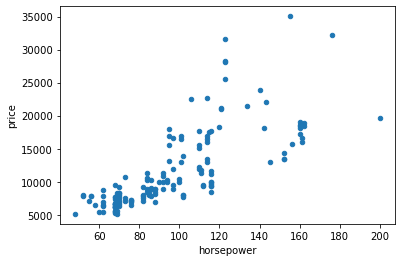

In [4]:
data.plot.scatter(x='horsepower',y='price')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


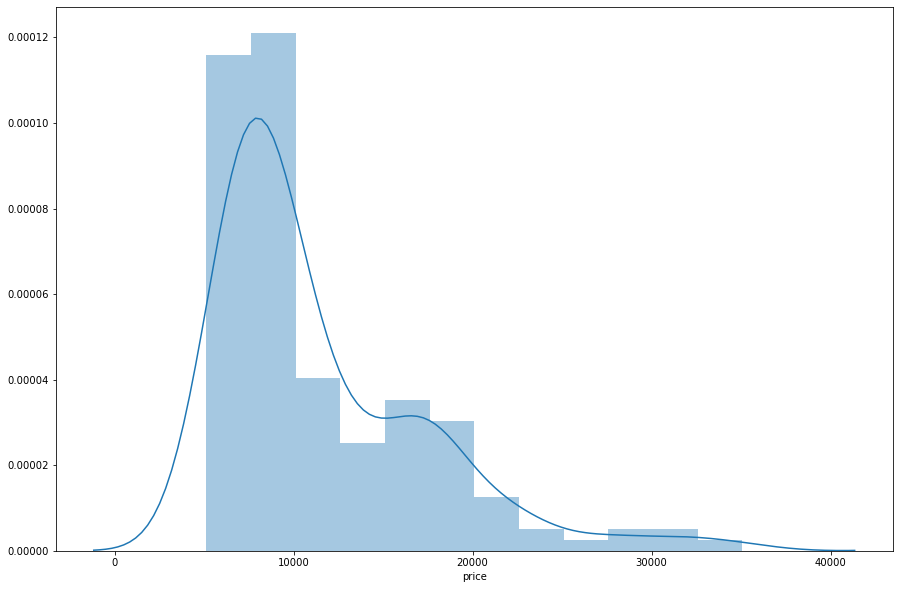

In [4]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['price'])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.3, random_state=0)

In [35]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])   
coeff_df

,Coefficient
wheel-base,2.518040e+05
length,-1.320236e+05
width,3.512515e+05
height,-1.197308e+06
curb-weight,-3.988619e+04
engine-size,1.026187e+05
bore,-1.163202e+07
stroke,-1.841984e+07
compression-ratio,5.063066e+05
horsepower,1.388112e+05


In [32]:
y_pred = regressor.predict(X_test)

In [33]:
print(y_pred)

[ 8208.64448592  9080.84699413  8713.36339041  7834.31812238
  9875.47739692 20507.39978393  9608.13487311 14982.79857823
  5421.62845145  9745.19671653 12986.80224498 21051.08275519
  7328.99784768 20473.66754035 16088.9869401   5767.78980975
  8515.83102342 14271.83943696 14160.97640503  6600.31189002
  7605.64731533  7894.03278807  8745.22845663 14288.58928304
  6303.91892755  7180.96478053  5648.55756902 11113.16222625
  9170.09473763 15051.84585476  8015.24108506 11205.35438393
 15095.13625247 13527.85546049  7907.81715772  8945.59611092
 13422.89249112  9278.00823821 16892.44333899 11949.46551973
 14209.64098811 10329.89641564  9968.69278278  6709.69920759
 31261.43626347 10752.91525655  8992.9563245   9477.03373125]


In [37]:
print(regressor.predict([[0.016626,0.026538,0.011341,0.010006,0.279862,0.011473,0.000547,0.000570,0.001787,0.009028,0.959205,0.008840,0.009968]]))

[2580.27001793]


In [38]:
df2=pd.DataFrame(normalized_X)
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.016626,0.026538,0.011341,0.010006,0.279862,0.011473,0.000547,0.000570,0.001787,0.009028,0.959205,0.008840,0.009968
1,0.016975,0.028344,0.012525,0.009958,0.335775,0.018033,0.000570,0.000668,0.001882,0.011369,0.940874,0.009605,0.010585
2,0.013803,0.023048,0.010185,0.008097,0.289936,0.014664,0.000464,0.000544,0.001466,0.012114,0.956358,0.004941,0.006057
3,0.016147,0.025848,0.011029,0.009064,0.316555,0.013613,0.000501,0.000529,0.001740,0.010339,0.947771,0.006548,0.007238
4,0.014849,0.023771,0.010142,0.008336,0.307441,0.014580,0.000461,0.000540,0.001458,0.012044,0.950847,0.004754,0.005388
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,0.019122,0.033185,0.012221,0.010204,0.651882,0.031812,0.000622,0.000633,0.003737,0.021382,0.756183,0.003824,0.004346
155,0.017068,0.031086,0.011518,0.008985,0.458790,0.021939,0.000515,0.000548,0.001371,0.017745,0.887252,0.003065,0.004033
156,0.016756,0.030519,0.011308,0.008853,0.488750,0.020747,0.000496,0.000538,0.001315,0.022173,0.871070,0.002692,0.003168
157,0.018036,0.031858,0.011109,0.008427,0.648977,0.041180,0.000579,0.000666,0.001293,0.028091,0.758150,0.002394,0.003033


In [39]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
0,5118,8208.644486
1,9980,9080.846994
2,8845,8713.363390
3,7898,7834.318122
4,13950,9875.477397
5,18399,20507.399784
6,10345,9608.134873
7,18150,14982.798578
8,5499,5421.628451
9,8499,9745.196717


In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred) ) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1749.7179325406767
Mean Squared Error: 6068838.3902133405
Root Mean Squared Error: 2463.501246237424
